In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.python.keras.layers import Dense
from numpy.random import default_rng
from sklearn.model_selection import train_test_split

In [68]:
# data = pd.read_csv('data/walk_data_14_Fernando.txt', sep=",", header=None, names=["e_t_x","e_t_y","e_t_z","e_r_x","e_r_y","e_r_z","e_r_w","d_t_x","d_t_y","d_t_z","d_r_x","d_r_y","d_r_z","d_r_w", "c_t_x","c_t_y","c_t_z","c_r_x","c_r_y","c_r_z", "c_r_w"])
# data_fernando = pd.read_csv('data/walk_data_1_Fernando.txt', sep=",", header=None, names=["e_t_x","e_t_y","e_t_z","e_r_x","e_r_y","e_r_z","d_t_x","d_t_y","d_t_z","d_r_x","d_r_y","d_r_z","c_t_x","c_t_y","c_t_z","c_r_x","c_r_y","c_r_z"])
data = pd.read_csv('data/full_data_10Hz.csv', sep=",", header=None, names=["e_t_x","e_t_y","e_t_z","e_r_x","e_r_y","e_r_z","e_r_w","d_t_x","d_t_y","d_t_z","d_r_x","d_r_y","d_r_z","d_r_w", "c_t_x","c_t_y","c_t_z","c_r_x","c_r_y","c_r_z", "c_r_w", "speed"])

In [69]:
data

,e_t_x,e_t_y,e_t_z,e_r_x,e_r_y,e_r_z,e_r_w,d_t_x,d_t_y,d_t_z,...,d_r_z,d_r_w,c_t_x,c_t_y,c_t_z,c_r_x,c_r_y,c_r_z,c_r_w,speed
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,stopped
1,-0.001,0.000,0.000,0.000,0.001,0.000,0.000,-0.001,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,stopped
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,stopped
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,...,0.000,-0.001,0.000,0.000,0.001,-0.001,0.000,0.001,0.000,stopped
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,stopped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41992,-0.002,-0.003,-0.016,0.000,0.006,-0.005,0.005,0.000,0.000,0.000,...,-0.001,-0.001,-0.003,0.001,-0.001,-0.002,0.004,-0.002,0.000,fast
41993,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,fast
41994,0.001,0.000,-0.006,-0.002,-0.012,0.011,0.001,0.000,0.000,-0.003,...,0.016,-0.020,-0.004,0.000,-0.008,0.001,0.000,-0.001,0.000,fast
41995,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,fast


In [70]:
result_stop = data[data.speed=="stopped"][1:]

result_stop.to_csv('data/vel_parada.csv', index=False)

In [71]:

result_slow = data[data.speed=="slow"][1:]
result_slow.to_csv('data/vel_media.csv', index=False)

In [72]:
result_fast = data[data.speed=="fast"][1:]
result_fast.to_csv('data/vel_rapida.csv', index=False)
result_fast

,e_t_x,e_t_y,e_t_z,e_r_x,e_r_y,e_r_z,e_r_w,d_t_x,d_t_y,d_t_z,...,d_r_z,d_r_w,c_t_x,c_t_y,c_t_z,c_r_x,c_r_y,c_r_z,c_r_w,speed
6001,0.000,0.000,0.000,0.000,-0.001,0.001,0.000,-0.006,-0.001,-0.016,...,-0.002,-0.002,0.004,-0.001,-0.001,0.003,0.002,-0.006,-0.001,fast
6002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,fast
6003,-0.001,0.001,0.002,0.011,-0.014,0.011,-0.004,0.000,-0.001,0.000,...,0.004,-0.003,0.002,0.000,-0.001,0.002,-0.001,-0.005,0.000,fast
6004,0.003,0.001,0.006,0.024,-0.030,0.011,0.019,0.000,0.000,0.000,...,0.000,0.001,0.000,0.001,-0.001,0.000,0.000,-0.001,0.000,fast
6005,0.004,0.001,0.011,0.011,0.013,-0.004,-0.007,0.000,0.000,0.000,...,0.000,0.000,-0.001,0.001,0.000,-0.001,0.000,0.000,0.001,fast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41992,-0.002,-0.003,-0.016,0.000,0.006,-0.005,0.005,0.000,0.000,0.000,...,-0.001,-0.001,-0.003,0.001,-0.001,-0.002,0.004,-0.002,0.000,fast
41993,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,fast
41994,0.001,0.000,-0.006,-0.002,-0.012,0.011,0.001,0.000,0.000,-0.003,...,0.016,-0.020,-0.004,0.000,-0.008,0.001,0.000,-0.001,0.000,fast
41995,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,fast


In [73]:
# Loading pipeline params.
DATA_PATH = Path('data')
FILENAME_FAST = 'vel_rapida.csv'
FILENAME_SLOW = 'vel_media.csv'
FILENAME_STOP = 'vel_parada.csv'
NUM_TIMESTEPS = 6
IGNORE_FRACTION = 0.1
TEST_FRACTION = 0.25

# Training params.
LEARNING_RATE = 1e-4
EPOCHS = 100
BATCH_SIZE = 1024

In [74]:
def load_data(
    path_stop,
    path_fast,
    path_slow,
    num_timesteps,
    ignore_fraction,
    test_fraction,
):

    def read_and_prepare_data(
        path,
        class_,
        num_timesteps,
        ignore_fraction,
        test_fraction,
    ):

        def split_temporally(X, test_fraction):
            num_samples = X.shape[0]
            num_train = int(num_samples * (1.0 - test_fraction))
            X_train, X_test = X[:num_train], X[num_train:]
            return X_train, X_test

        def transform_into_sequences(X, num_timesteps):
            num_samples = X.shape[0]
            X_seq = []
            for k in range(num_samples - num_timesteps + 1):
                X_seq.append(X[k:(k + num_timesteps)])
            X_seq = np.array(X_seq)
            y_seq = class_ * np.ones((X_seq.shape[0], 1))
            return X_seq, y_seq

        X = pd.read_csv(path).values
        X = X[:, [0,1,2,7,8,9]]  # Use only feet translations.

        # Ignore beginning and end.
        num_samples = X.shape[0]
        num_ignore = int(ignore_fraction * num_samples)
        X = X[num_ignore:-num_ignore]

        # Split X temporally.
        X_train, X_test = split_temporally(X, test_fraction)

        # Transform X into short sequences.
        X_train, y_train = transform_into_sequences(X_train, num_timesteps)
        X_test, y_test = transform_into_sequences(X_test, num_timesteps)

        return X_train, y_train, X_test, y_test

    def shuffle_data(X, y):
        idx = np.arange(len(X))
        default_rng().shuffle(idx)
        X_shuffled = X[idx, :]
        y_shuffled = y[idx]
        return X_shuffled, y_shuffled

    X_train_fast, y_train_fast, X_test_fast, y_test_fast = \
        read_and_prepare_data(
            path_fast,
            2.0,
            num_timesteps,
            ignore_fraction,
            test_fraction,
        )

    X_train_stop, y_train_stop, X_test_stop, y_test_stop = \
        read_and_prepare_data(
            path_stop,
            0.0,
            num_timesteps,
            ignore_fraction,
            test_fraction,
        )
    X_train_slow, y_train_slow, X_test_slow, y_test_slow = \
        read_and_prepare_data(
            path_slow,
            1.0,
            num_timesteps,
            ignore_fraction,
            test_fraction,
        )

    X_train = np.concatenate((X_train_fast, X_train_slow, X_train_stop), axis=0)
    y_train = np.concatenate((y_train_fast, y_train_slow, y_train_stop), axis=0)
    X_test = np.concatenate((X_test_fast, X_test_slow, X_test_stop), axis=0)
    y_test = np.concatenate((y_test_fast, y_test_slow, y_test_stop), axis=0)

    X_train, y_train = shuffle_data(X_train, y_train)
    X_test, y_test = shuffle_data(X_test, y_test)

    return X_train, X_test, y_train, y_test


path_fast = Path(DATA_PATH, FILENAME_FAST)
path_slow = Path(DATA_PATH, FILENAME_SLOW)
path_stop = Path(DATA_PATH, FILENAME_STOP)
X_train, X_test, y_train, y_test = load_data(
    path_stop,
    path_fast,
    path_slow,
    NUM_TIMESTEPS,
    IGNORE_FRACTION,
    TEST_FRACTION,
)

In [75]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25184, 6, 6), (25184, 1), (8386, 6, 6), (8386, 1))

In [76]:
X_train[0]

array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.001, 0.0, -0.001, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.001, -0.001, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], dtype=object)

In [77]:
# from functools import partial

# _, num_time, num_feat = X_train.shape

# activation = 'selu'

# DefaultConv1D = partial(
#     keras.layers.Conv1D,
#     kernel_size=1,
#     activation=activation,
#     padding="valid",
# )

# model = keras.models.Sequential([
#     DefaultConv2D(4 * num_feat, kernel_size=4, input_shape=[num_time, num_feat]),
#     keras.layers.BatchNormalization(),
#     DefaultConv1D(num_feat, kernel_size=2),
#     keras.layers.Flatten(),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(num_time * num_feat, activation=activation),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(num_feat, activation=activation),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(3, activation='softmax'),
# ])

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

CNN = Sequential(name="Sequential_CNN")

CNN.add(Conv2D(64, kernel_size=(4, 4),
               strides=(1, 1), padding="same",
               activation="selu", input_shape=(6, 6, 1)))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

# Add another pair of Conv2D and MaxPooling2D for more model depth,
# followed by the flatten and multiple dense layers

CNN.add(Conv2D(32, kernel_size=(3, 3),
               strides=(1, 1), padding="same",
               activation="relu"))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1),
                     padding="valid"))

CNN.add(Flatten())

CNN.add(Dense(64, activation='selu'))
CNN.add(Dense(32, activation='selu'))
CNN.add(Dense(3, activation='softmax'))

CNN.summary()

Model: "Sequential_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 6, 6, 64)          1088      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 2, 2, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)             

In [93]:
X_train=np.array(X_train, dtype=np.float)
y_train=np.array(y_train, dtype=np.float)
X_test=np.array(X_test, dtype=np.float)
y_test=np.array(y_test, dtype=np.float)

/var/folders/0t/r6pd3gzs67n8rkyyt6l75dy80000gn/T/ipykernel_701/1231226972.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train=np.array(X_train, dtype=np.float)
/var/folders/0t/r6pd3gzs67n8rkyyt6l75dy80000gn/T/ipykernel_701/1231226972.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train=np.array(y_train, dtype=np.float)
/var

In [94]:
# model.summary()

In [95]:
# optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# model.compile(
#     loss='sparse_categorical_crossentropy',
#     optimizer=optimizer,
#     metrics=['accuracy'],
# )

# history = model.fit(
#     X_train,
#     y_train,
#     epochs=EPOCHS,
#     batch_size=BATCH_SIZE,
#     validation_data=(X_test, y_test),
#     verbose=1,
# )

In [97]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

CNN.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'],
)


history = CNN.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=256,
    validation_data=(X_test, y_test),
    verbose=1,
)

Epoch 1/100
99/99 [==============================] - 2s 18ms/step - loss: 0.1929 - accuracy: 0.9273 - val_loss: 0.9770 - val_accuracy: 0.7887
Epoch 2/100
99/99 [==============================] - 2s 16ms/step - loss: 0.1814 - accuracy: 0.9322 - val_loss: 1.0263 - val_accuracy: 0.7948
Epoch 3/100
99/99 [==============================] - 2s 17ms/step - loss: 0.1790 - accuracy: 0.9322 - val_loss: 1.0630 - val_accuracy: 0.7916
Epoch 4/100
99/99 [==============================] - 2s 16ms/step - loss: 0.1751 - accuracy: 0.9346 - val_loss: 1.1233 - val_accuracy: 0.7920
Epoch 5/100
99/99 [==============================] - 2s 16ms/step - loss: 0.1731 - accuracy: 0.9350 - val_loss: 1.1837 - val_accuracy: 0.7906
Epoch 6/100
99/99 [==============================] - 2s 16ms/step - loss: 0.1720 - accuracy: 0.9354 - val_loss: 1.1791 - val_accuracy: 0.7889
Epoch 7/100
99/99 [==============================] - 2s 17ms/step - loss: 0.1708 - accuracy: 0.9369 - val_loss: 1.1849 - val_accuracy: 0.7888
Epoch 

99/99 [==============================] - 2s 16ms/step - loss: 0.1308 - accuracy: 0.9542 - val_loss: 2.2534 - val_accuracy: 0.7893
Epoch 59/100
99/99 [==============================] - 2s 15ms/step - loss: 0.1288 - accuracy: 0.9545 - val_loss: 2.2571 - val_accuracy: 0.7874
Epoch 60/100
99/99 [==============================] - 2s 16ms/step - loss: 0.1283 - accuracy: 0.9552 - val_loss: 2.3002 - val_accuracy: 0.7882
Epoch 61/100
99/99 [==============================] - 2s 15ms/step - loss: 0.1270 - accuracy: 0.9563 - val_loss: 2.4263 - val_accuracy: 0.7865
Epoch 62/100
99/99 [==============================] - 2s 16ms/step - loss: 0.1278 - accuracy: 0.9546 - val_loss: 2.3510 - val_accuracy: 0.7912
Epoch 63/100
99/99 [==============================] - 2s 15ms/step - loss: 0.1279 - accuracy: 0.9550 - val_loss: 2.3598 - val_accuracy: 0.7848
Epoch 64/100
99/99 [==============================] - 2s 15ms/step - loss: 0.1268 - accuracy: 0.9552 - val_loss: 2.3982 - val_accuracy: 0.7858
Epoch 65/100

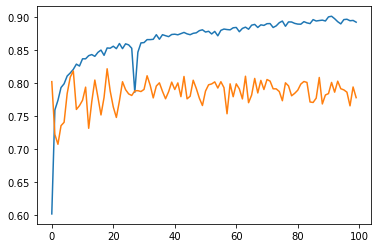

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

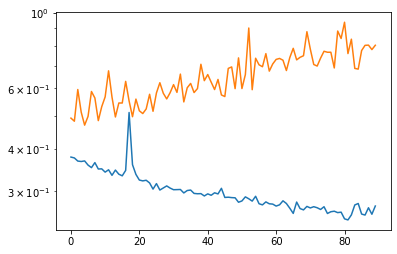

In [61]:
plt.plot(history.history['loss'][10:])
plt.plot(history.history['val_loss'][10:])
plt.yscale('log')

In [62]:
y_pred = CNN.predict(X_test)

263/263 [==============================] - 1s 2ms/step


In [63]:
y_pred

array([[2.9181524e-03, 8.5300887e-01, 1.4407291e-01],
       [3.1677308e-04, 3.5768244e-01, 6.4200079e-01],
       [9.9681562e-01, 1.8480684e-03, 1.3363727e-03],
       ...,
       [7.7863416e-04, 1.5360472e-01, 8.4561670e-01],
       [5.3511150e-05, 1.2707832e-01, 8.7286818e-01],
       [4.4056965e-04, 9.0017334e-02, 9.0954202e-01]], dtype=float32)

In [64]:
model.evaluate(X_test, y_test)

NameError: name 'model' is not defined

In [ ]:
y_pred= np.argmax(y_pred, axis=1)

In [ ]:
y_pred

In [216]:
y_pred[0]

2

In [206]:
df = pd.DataFrame({
    'y_test': y_test.ravel().astype(int).tolist(),
    'y_pred': y_pred.ravel().astype(int).tolist(),
})

In [207]:
pd.crosstab(df['y_test'], df['y_pred'])

y_pred,0,1,2
y_test,,,
0,3289,285,21
1,91,1007,1298
2,38,274,2083


In [209]:
model.save('model.h5')

In [210]:
CNN.save('CNN.h5')

In [ ]:
np.argmax(model.predict(np.array([[[0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08]]])))

In [ ]:
x_new = X_test[0,:,:]

In [ ]:
argmax(model.predict(np.array([[[-0.04,  0.69,  0.72,  0.07, -0.19, -0.63, -0.71,  0.23],
       [-0.13,  0.69,  0.7 ,  0.14, -0.19, -0.64, -0.71,  0.23],
       [-0.22,  0.67,  0.67,  0.23, -0.19, -0.64, -0.71,  0.23],
       [-0.25,  0.67,  0.65,  0.25, -0.19, -0.64, -0.71,  0.23],
       [-0.31,  0.65,  0.63,  0.3 , -0.19, -0.64, -0.71,  0.23],
       [-0.35,  0.63,  0.6 ,  0.34, -0.19, -0.64, -0.71,  0.23],
       [-0.34,  0.64,  0.61,  0.33, -0.19, -0.64, -0.71,  0.23],
       [-0.34,  0.64,  0.61,  0.33, -0.19, -0.64, -0.71,  0.23],
       [-0.24,  0.67,  0.66,  0.25, -0.19, -0.64, -0.71,  0.23],
       [-0.12,  0.69,  0.7 ,  0.14, -0.19, -0.64, -0.71,  0.23]]])))

In [ ]:
x_new.shape

In [ ]:
(1,) + x_new.shape

In [ ]:
X_new = x_new.reshape((1,) + x_new.shape)
fast_or_slow = saved_model(X_new)

In [ ]:
float(fast_or_slow[0, 0])

In [ ]:
prnt(X_new.tolist())


In [155]:
model.save('model.h5')

In [ ]:
np.fromstring(X_new.tobytes(), dtype=float).reshape(1,10,4)

In [ ]:
comma_string = "[[[-1.402271e-03 -2.203955e-08 7.028995e-07 9.999990e-01 -2.328306e-10 -6.455648e-09 7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00]]])"

In [ ]:
spaces_string = comma_string.replace(' ', ',')
spaces_string

In [ ]:
import ast
input = np.array([[[0.08, 0.14, 0.09, 0.18],
       [0.08, 0.14, 0.09, 0.22],
       [0.08, 0.14, 0.08, 0.17],
       [0.08, 0.14, 0.08, 0.1 ],
       [0.08, 0.14, 0.07, 0.08],
       [0.08, 0.14, 0.07, 0.08],
       [0.09, 0.2 , 0.07, 0.08],
       [0.1 , 0.32, 0.07, 0.07],
       [0.1 , 0.29, 0.07, 0.07],
       [0.09, 0.24, 0.07, 0.07]]])
    
lista_string="[0.08, 0.14, 0.09, 0.18]"
lista= ast.literal_eval(lista_string)
input = np.insert(input[0], 0,lista).reshape(1,11,4)
input = input[:,:-1,:]
input

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
/content/my_model

In [ ]:
!zip -r model.zip model/ 

In [ ]:
print(json_str)

In [ ]:
input = np.array([[[ 2.66, -1.94,  0.66, -0.07],
       [ 2.66, -1.94,  0.66, -0.07],
       [ 2.65, -2.1 ,  0.66, -0.07],
       [ 2.65, -2.2 ,  0.66, -0.07],
       [ 2.65, -2.22,  0.66, -0.07],
       [ 2.65, -2.22,  0.68,  0.01],
       [ 2.64, -2.22,  0.68,  0.18],
       [ 2.64, -2.22,  0.69,  0.26],
       [ 2.64, -2.22,  0.67,  0.16],
       [ 2.64, -2.22,  0.67,  0.03]]])

In [ ]:
import ast
lista_string="[ 2.66, -1.94,  0.66, -0.07]"
lista= ast.literal_eval(lista_string)
input = np.append(input[0],[lista],axis=0).reshape(1,11,4)
input = input[:,1:,:]

In [ ]:
input

In [ ]:
X_train[0]

In [ ]:
import re

s = "[[[-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00]]]"

def add_comma(match):
    return match.group(0) + ','

s = re.sub(r'\[[0-9\.\s]+\]', add_comma, s)
s = re.sub(r'([0-9\.]+)', add_comma, s)
mylist = eval(s)

In [ ]:
mylist